In [2]:
import pandas as pd
import numpy as np
import csv
import copy

In [4]:
#Read in the Data
ld1 = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_longtrips.csv', encoding = "ISO-8859-1", low_memory=False)
ld2 = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_longtrips_v02.csv', encoding = "ISO-8859-1", low_memory=False)

r1 = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_activity.csv', encoding = "ISO-8859-1", low_memory=False)
r1.head()

,sampno,perno,tripno,actno,plano,place_name,assn,travel_date,arr_time,dep_time,...,county_id,pprimarycity,city,zipcode,perwgt,experwgt,tcf,tcfperwgt,exptcfperwgt,geom
0,1039879,1,NaN,1,1,REDACTED,12676,6/24/12,3:00:00,8:00:00,...,19.0,FRESNO,FRESNO,93702,0.061313,20.773961,NaN,NaN,NaN,REDACTED
1,1041766,3,NaN,1,1,REDACTED,12622,5/1/12,3:00:00,8:00:00,...,81.0,MILLBRAE,MILLBRAE,94030,1.495684,506.761593,NaN,NaN,NaN,REDACTED
2,1043722,2,3.0,1,4,REDACTED,12685,7/3/12,18:50:00,2:59:00,...,107.0,DINUBA,DINUBA,93618,0.037536,12.717828,1.513745,0.056820,19.251557,REDACTED
3,1050668,1,NaN,3,1,REDACTED,12625,5/4/12,8:00:00,8:30:00,...,111.0,THOUSAND OAKS,THOUSAND OAKS,91360,0.016209,5.491942,NaN,NaN,NaN,REDACTED
4,1051203,1,8.0,1,9,REDACTED,12628,5/7/12,18:16:00,2:59:00,...,75.0,SAN FRANCISCO,SAN FRANCISCO,94102,0.446021,151.119204,1.219836,0.544073,184.340790,REDACTED


In [26]:
#get two series of only trip purpose

ldSeries1 = ld1["trip_purpose"]
ldSeries2 = ld2["trip_purpose"] 
rSeries = r1["purpose"]
rSeries.head()

0    1
1    1
2    1
3    4
4    1
Name: purpose, dtype: int64

In [22]:
#append the two series
ldSeries_f = ldSeries1.append(ldSeries2)
print(ldSeries1.size)
print(ldSeries2.size)
print(ldSeries_f.size)
print(68193*2)

68193
68193
136386
136386


In [24]:
#now find counts for LD
ldCounts = ldSeries_f.value_counts()
ldCounts

12    47076
5     26154
7     15360
2     12406
9      5846
1      5638
10     5572
8      5534
6      3744
11     2434
3      2252
4      1888
97     1516
99      522
98      444
Name: trip_purpose, dtype: int64

In [27]:
#now find counts for regular
rCounts = rSeries.value_counts()
rCounts

1     203178
2      63538
27     34344
9      30530
8      27406
22     25265
21     24073
37     21980
7      19989
31     18326
39     13778
17     11270
34     10339
25      9940
29      9204
33      7376
36      7331
30      7086
5       6099
32      6016
11      5099
26      5067
35      4911
23      4723
38      4635
4       4211
6       4157
3       3461
28      2846
18      2339
24      1275
20      1236
16      1077
19       790
15       575
13       343
14       330
10       268
99       194
12       106
Name: purpose, dtype: int64

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

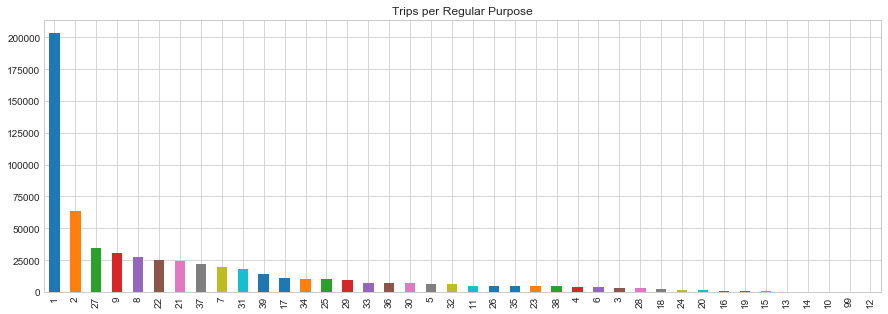

In [36]:
r_plot = rCounts.plot(kind='bar', title="Trips per Regular Purpose", figsize=(15,5))

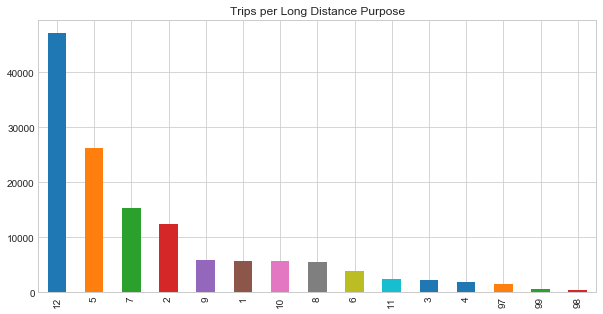

In [31]:
ld_plot = ldCounts.plot(kind='bar', title="Trips per Long Distance Purpose", figsize=(10,5))